<a href="https://colab.research.google.com/github/higordevellard/transformations/blob/main/excel_GP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP - Disciplina: Sprint I: Análise de Dados e Boas Práticas
## Aluno: Higor Morais Devellard

## 1.Motivação

Uma das diversas áreas que um engenheiro eletricista pode atuar é a área de planejamento estratégico na geração de energia, sendo para uma empresa privada de geração ou em uma empresa estatal, onde os dados analisados podem ser de uma cidade, estado ou de todo um país.

Um grande desafio que os países enfrentam é conseguir conhecer 100% da sua matriz energética, conseguir montar um dataset atualizado com dados diários de geração e periodicamente prever o consumo de energia para os próximos meses e anos, e com isso, é possível determinar estratégias de operação e infraestrutura para todo um território.



## 2.Pacotes Usados

In [ ]:
# Configuração para não exibir os warnings dos pacotes selecionados
import warnings
warnings.filterwarnings("ignore")

# Importação de pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from sklearn.preprocessing import MinMaxScaler # Normalização
from sklearn.preprocessing import StandardScaler # Padronização
from sklearn.model_selection import train_test_split #Treino e Teste
from sklearn.preprocessing import PolynomialFeatures # Criar features polinomiais
from sklearn.linear_model import LinearRegression # Criar Modelo d Regressão.
from sklearn.metrics import mean_squared_error # Calcular Erro da Regressão


## 3.Carga do Dataset

O dataset escolhido para este MVP é uma amostra que detalha o consumo de energia dos Estados Unidos entre os anos de 2001 - 2022. O Estudo será importante para conhecer melhor sobre a matriz energética deste país.

Demais datasets foram incluídos no estudo devido à necessidade de analisar os dados utilizando outros parâmetros, essa necessidade surgiu no decorrer do desenvolvimento deste trabalho e será discutido melhor posteriormente.

In [ ]:
# Localicazão do dataset
url_1 = 'https://raw.githubusercontent.com/higordevellard/MVP_01/main/consumo_energia_eua_parte1.csv'
url_2 = 'https://raw.githubusercontent.com/higordevellard/MVP_01/main/consumo_energia_eua_parte2.csv'
url_3 = 'https://raw.githubusercontent.com/higordevellard/MVP_01/main/media_temperatura_eua.csv'
url_4 = 'https://raw.githubusercontent.com/higordevellard/MVP_01/main/consumidores_eua.csv'
url_5 = 'https://raw.githubusercontent.com/higordevellard/MVP_01/main/pre%C3%A7o_kwh.csv'

# Labels dos atributos do dataset
labels_atributos = ['ID', 'Ano', 'Mês', 'Estado', 'Tipo_de_produção', 'Fonte_de_Energia', 'Geração(MWh)']
labels_atributos_temperatura = ['Mês/Ano', 'Temperatura(°F)', 'Temperatura(°C)']
labels_atributos_consumidores = ['qtd_consumidores', 'Mês/Ano']
labels_atributos_preço = ['preço(cents/kWh)_residencial', 'preço(cents/kWh)_comercial', 'preço(cents/kWh)_industrial', 'Mês/Ano']

# Lê o arquivo
dataset_p1 = pd.read_csv(url_1, names=labels_atributos, header=0, delimiter=',')
dataset_p2 = pd.read_csv(url_2, names=labels_atributos, header=0, delimiter=',')
dataset_temperatura = pd.read_csv(url_3, names=labels_atributos_temperatura, header=0, delimiter=',')
dataset_consumidores = pd.read_csv(url_4, names=labels_atributos_consumidores, header=0, delimiter=',')
dataset_price_kwh = pd.read_csv(url_5, names=labels_atributos_preço, header=0, delimiter=',')

### **3.1Informação sobre os datasets**


*   Os datasets referentes às variáveis "url_1" e "url_2" foram importados pelo kaggle no seguinte endereço: https://www.kaggle.com/datasets/kevinmorgado/us-energy-generation-2001-2022 , onde o mesmo foi elaborado por dados fornecidos pelo governo norte americano no endereço https://www.eia.gov/electricity/

Devido à limitação do kaggle para carregamento de datasets, foi considerado a divisão dos datasets de geração de energia em duas partes.

*   o dataset referente à variável "url_3" contém a temperatura média mensal registrada nos EUA durante durante os anos de 2001 à 2022.
Os dados podem ser obtidos acessando o endereço: https://www.ncei.noaa.gov/access/monitoring/products/

* o dataset referente às variáveis "url_4" e "url_5" contém a quantidade de consumidores de energia ao longo do tempo e o valor médio pago por kWh nos EUA, separado por valor pago para residências, comercio e industria.
Os dados podem ser obtidos acessando o endereço: https://www.eia.gov/totalenergy/








## 4.Análise Exploratória de Dados

###4.1Informações Gerais - Dataset Geração de Energia

In [ ]:
#Concatenar as duas tabelas que foram divididas devido ao peso.
dataset = pd.concat([dataset_p1, dataset_p2])

In [ ]:
# Mostra as dimensões do dataset (linhas e colunas)
dataset.shape

(496773, 7)

In [ ]:
# Mostra as informações do dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 496773 entries, 0 to 246773
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                496773 non-null  int64  
 1   Ano               496773 non-null  int64  
 2   Mês               496773 non-null  int64  
 3   Estado            496773 non-null  object 
 4   Tipo_de_produção  496773 non-null  object 
 5   Fonte_de_Energia  496773 non-null  object 
 6   Geração(MWh)      496773 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 30.3+ MB


**Observações importantes levantadas após os resultados da função .info():**

1)Todos os 7 atributos foram devidamente carregados.

2)Todas as 496773 Instâncias (linhas) são não nulas (Sem missings).

3) as colunas "Mês" e "Ano" estão como tipo inteiro, inicialmente não há necessidade de alteração, posteriormente será criada uma nova coluna tipo data no formado Mês/Ano.

4) as colunas 3,4 e 5 estão no formato esperado, assim como a coluna 6 que deverá retornar um valor decimal para a geração de energia.


In [ ]:
# Verificar a presença de linhas duplicadas no dataset.
print(dataset.duplicated().sum())

0


In [ ]:
# Mostra as 10 primeiras linhas do dataset
dataset.head(10)

,ID,Ano,Mês,Estado,Tipo_de_produção,Fonte_de_Energia,Geração(MWh)
0,0,2001,1,AK,Total Electric Power Industry,Coal,46903.0
1,1,2001,1,AK,Total Electric Power Industry,Petroleum,71085.0
2,2,2001,1,AK,Total Electric Power Industry,Natural Gas,367521.0
3,3,2001,1,AK,Total Electric Power Industry,Hydroelectric Conventional,104549.0
4,4,2001,1,AK,Total Electric Power Industry,Wind,87.0
5,5,2001,1,AK,Total Electric Power Industry,Total,590145.0
6,6,2001,1,AK,"Electric Generators, Electric Utilities",Coal,18410.0
7,7,2001,1,AK,"Electric Generators, Electric Utilities",Petroleum,64883.0
8,8,2001,1,AK,"Electric Generators, Electric Utilities",Natural Gas,305277.0
9,9,2001,1,AK,"Electric Generators, Electric Utilities",Hydroelectric Conventional,104549.0


**Descrição dos Atributos e Instâncias do Dataset**

**Atributos:** "Ano", "Mês", "Estado", "Tipo_de_produção", "Fonte_de_Energia" e	"Geração(MWh)".

**1.**  Os atributos temporais **"Mês"** e **"Ano"** apresentam instâncias de 01/2001 à 05/2022.

**2.**  Para o atributo **"Estado"** temos 52 variáveis categóricas nominais, sendo: 51 estados dos EUA em sua forma abreviada e o atributo "US-TOTAL" que se refere a soma do valor gerado de todos os estados.

**3.**   O atributos categórico nominal **"Tipo_de_produção"** está dividido em diversas instâncias, sendo elas:

*   'Electric Generators, Electric Utilities' e 'Electric Generators, Independent Power Producers'

> **Electric generators** (Geradores elétricos) são equipamentos que convertem outras formas de energia, como energia mecânica, térmica ou química, em energia elétrica. Esses geradores são usados em uma variedade de aplicações, desde pequenos geradores portáteis para uso doméstico até grandes usinas de energia que fornecem eletricidade para cidades inteiras.

>**Electric utilities**, são empresas que fornecem eletricidade aos consumidores. Eles são responsáveis pela produção, transmissão e distribuição de energia elétrica para residências, empresas e indústrias. As utilities podem ser públicas, privadas ou uma combinação de ambas. Além disso, elas geralmente têm o monopólio sobre a distribuição de energia em sua área de serviço.

>**Independent Power Producers** (IPPs) são empresas que produzem eletricidade para venda a outras empresas ou ao público em geral. Eles geralmente são empresas privadas que operam em mercados de energia liberalizados e não são controlados por empresas de serviços públicos reguladas pelo governo. Os IPPs podem gerar eletricidade usando uma variedade de fontes. Eles podem vender a energia que produzem diretamente a outras empresas ou ao público em geral, ou podem vender a energia a um intermediário que a revende para outras empresas ou ao público.

* 'Combined Heat and Power, Electric Power', 'Combined Heat and Power, Commercial Power' e 'Combined Heat and Power, Industrial Power'

>Um sistema de Geração **Combined Heat and Power** (CHP), também conhecido como cogeração, gera simultaneamente eletricidade e calor a partir de uma única fonte de combustível. A quantidade de eletricidade e calor produzida pode variar dependendo do sistema específico de CHP e sua aplicação.

As instâncias Combined Heat and Power (CHPs) estão divididas em três tipos:

>**Electric Power** (Energia Elétrica), se refere à eletricidade gerada pelo sistema de CHP que é devolvida à rede elétrica. Pode ser usada por clientes residenciais, comerciais e industriais que estão conectados à rede.

>**Commercial power** (Energia comercial), se refere à eletricidade gerada pelo sistema de CHP que é usada no local por um cliente comercial, como um hotel, hospital ou prédio de escritórios. Essa eletricidade pode alimentar as operações do cliente, como iluminação, computadores e outros equipamentos.

>**Industrial power** (Energia industrial), se refere à eletricidade gerada pelo sistema de CHP que é usada no local por um cliente industrial, como uma planta de manufatura ou refinaria. Essa eletricidade pode alimentar os processos de produção do cliente, como motores, bombas e outros equipamentos.

*   'Total Electric Power Industry'

Instância que retornará a soma do que foi gerado pelos demais atributos categóricos descritos acima.

**4.**  O atributo categórico nominal **"Fonte_de_energia"** irá indicar qual a matéria prima usada para a geração de energia, podendo ser:

'Coal' (Carvão)

'Petroleum' (Petróleo)

'Natural Gas' (Gás Natural)

'Hydroelectric Conventional' (Hidroelétrica convencional)

'Wind' (Eólica)

'Other Gases' (Outros gases, como por exemplo gas carvão, gás de aterros sanitários)

'Nuclear' (Nuclear)

'Wood and Wood Derived Fuels' (Madeira e combustíveis derivados de madeira)

'Other Biomass' (Demais resíduos agrículas e florestais)

'Solar Thermal and Photovoltaic' (Energia Solar)

'Pumped Storage' (Armazenamento por Bombeamento): Não muito falada, mas é a energia que é armazenada por bombeamento de água de um reservatório inferior para um reservatório superior durante períodos de baixa demanda de energia. Quando a demanda de energia é alta, a água é liberada do reservatório superior para gerar eletricidade em uma turbina.

'Geothermal' (Geotérmica - proveniente do calor da Terra).

'Other' (Outro) - Todos os demais meios de geração de energia existentes estão agrupados nessa instância, como por exemplo a energia gerada por ondas.

'Total' - Instância que representa a união de todos as fontes de energia listas.

**5.**   **Geração(MWh)** - Atributo Quantitativo que representa a geração de energia em MWh que significa megawatt-hora, para quem não está familiarizado com o termo, uma unidade de medida de energia elétrica. Um megawatt-hora é igual a um milhão de watts de potência utilizados durante uma hora. É uma medida comum para quantificar a quantidade de energia elétrica que é produzida ou consumida ao longo do tempo. Por exemplo, se uma usina de energia produz 100 megawatts de eletricidade por uma hora, isso seria igual a 100 MWh de energia elétrica produzida.







### **4.2Manipulação dos dados para análise exploratória**

In [ ]:
# Conversão de grandeza energética.
dataset['Geração(TWh)'] = dataset['Geração(MWh)'] / (10 ** 6)

**Obs: A Alteração dos valores de geração de energia de Megawatt.hora para Terawatt.hora foi realizada para melhor visualização dos dados nos gráficos que serão realização nesse estudo.**

1 kWh = 1.000 Wh

1 MWh = 1.000.000 Wh

1 TWh = 1.000.000.000.000 Wh

In [ ]:
# Ocultar a primeira coluna de índice
dataset_1 = dataset.drop(['ID', 'Geração(MWh)'], axis=1)

In [ ]:
# Verificando se a transformação foi devidamente realizada
dataset_1.head(10)

,Ano,Mês,Estado,Tipo_de_produção,Fonte_de_Energia,Geração(TWh)
0,2001,1,AK,Total Electric Power Industry,Coal,0.046903
1,2001,1,AK,Total Electric Power Industry,Petroleum,0.071085
2,2001,1,AK,Total Electric Power Industry,Natural Gas,0.367521
3,2001,1,AK,Total Electric Power Industry,Hydroelectric Conventional,0.104549
4,2001,1,AK,Total Electric Power Industry,Wind,0.000087
5,2001,1,AK,Total Electric Power Industry,Total,0.590145
6,2001,1,AK,"Electric Generators, Electric Utilities",Coal,0.018410
7,2001,1,AK,"Electric Generators, Electric Utilities",Petroleum,0.064883
8,2001,1,AK,"Electric Generators, Electric Utilities",Natural Gas,0.305277
9,2001,1,AK,"Electric Generators, Electric Utilities",Hydroelectric Conventional,0.104549


In [ ]:
# Criando uma nova coluna concatenando as informações de Mês e Ano
dataset_1['Mês/Ano'] = dataset_1['Mês'].astype(str) + '/' + dataset_1['Ano'].astype(str)

In [ ]:
# Formatando a nova coluna como data
dataset_1['Mês/Ano'] = pd.to_datetime(dataset_1['Mês/Ano'], format='%m/%Y')

In [ ]:
# Verificando se a transformação foi devidamente  realizada
dataset_1.head()

,Ano,Mês,Estado,Tipo_de_produção,Fonte_de_Energia,Geração(TWh),Mês/Ano
0,2001,1,AK,Total Electric Power Industry,Coal,0.046903,2001-01-01
1,2001,1,AK,Total Electric Power Industry,Petroleum,0.071085,2001-01-01
2,2001,1,AK,Total Electric Power Industry,Natural Gas,0.367521,2001-01-01
3,2001,1,AK,Total Electric Power Industry,Hydroelectric Conventional,0.104549,2001-01-01
4,2001,1,AK,Total Electric Power Industry,Wind,0.000087,2001-01-01


## **5.Visualizações**

Tópico destinado à elaboração de gráficos e comentários.

####**5.1.Geração de Energia Total - EUA.**

Optando por começar por uma parte específica dos dados, nessa parte do trabalho iremos tratar apenas dos dados que se referem à geração total de energia nos EUA.

#####**5.1.1.Preparação dos Dados**

In [ ]:
# Filtro da coluna "fonte_de_energia" somente registros iguais à "Total"
dataset_2_0 = dataset_1['Fonte_de_Energia'] == 'Total'

# Filtro da coluna Estado para registros iguais à "US-TOTAL"
dataset_2_1 = dataset_1['Estado'] == 'US-TOTAL'

# Filtro da coluna "Tipo_de_produção" para saber a soma do que foi gerado
dataset_2_2 = dataset_1['Tipo_de_produção'] == 'Total Electric Power Industry'

# Guardar em uma nova variável os 03 filtros gerados.
dataset_3 = dataset_1[dataset_2_0 & dataset_2_1 & dataset_2_2]

# Agrupar as colunas de Mês/ano com o estado para saber o valor gerado.
dataset_4 = dataset_3.groupby(['Mês/Ano', 'Estado'])['Geração(TWh)'].sum().reset_index()

# Verificação da nova tabela.
dataset_4.head()

,Mês/Ano,Estado,Geração(TWh)
0,2001-01-01,US-TOTAL,332.493160
1,2001-02-01,US-TOTAL,282.940198
2,2001-03-01,US-TOTAL,300.706544
3,2001-04-01,US-TOTAL,278.078871
4,2001-05-01,US-TOTAL,300.491621


#####**5.1.2.Gráfico Geração de Energia (TWh)**

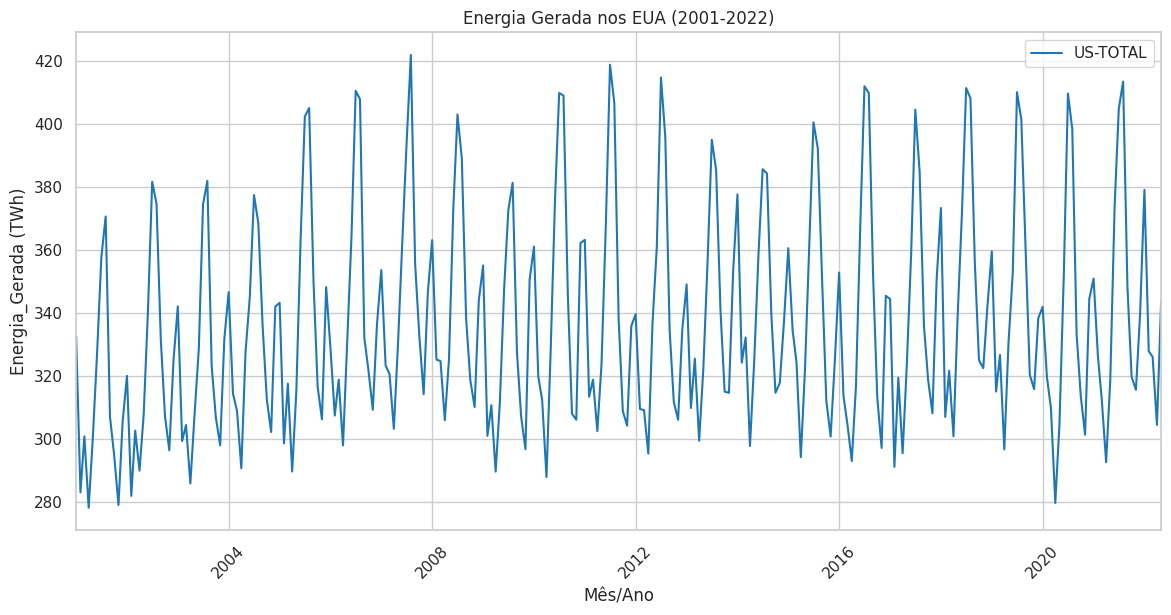

In [ ]:
# Definindo a dimensão para a figura que será criada
fig, ax = plt.subplots(figsize=(14,6))

# O Loop for será usado para percorrer todos os dados
for estado in dataset_4['Estado'].unique():
    df_grafico = dataset_4[dataset_4['Estado'] == estado]
    ax.plot(df_grafico['Mês/Ano'], df_grafico['Geração(TWh)'], label=estado)

# Adicione legendas e títulos
ax.legend()
ax.set_xlabel('Mês/Ano')
ax.set_ylabel('Energia_Gerada (TWh)')
ax.set_title('Energia Gerada nos EUA (2001-2022)')

# Define o limite inferior do eixo x como o primeiro valor obtido
x_min = dataset_4['Mês/Ano'].min()
x_max = dataset_4['Mês/Ano'].max()
ax.set_xlim(left=x_min, right=x_max)

plt.xticks(rotation=45)
plt.subplots_adjust(bottom=0.05)

O gráfico de geração de energia nos EUA ao longo dos anos apresenta pontos interessantes a serem observados:

*   Os EUA vinham crescendo de forma significativa a geração de energia a partir dos anos 2001, apresentando vasto crescimento de 2005 à 2007.
*   Com o surgimento da crise financeira de 2008, que foi uma crise global que se iniciou nos EUA resultado do colapso imobiliário e da concessão de empréstimos hipotecários de alto risco, pode-se perceber a diminuição na geração de energia entre os anos de 2008 à 2009. Onde em 2010 a economia dos EUA começou a apresentar sinais de recuperação e a geração de energia voltou a subir.
*   Em torno de 2013 os EUA enfrentaram o "Fiscal Cliff" uma crise fiscal em que o governo enfrentou a possibilidade de um abismo fiscal e o País ainda enfrentava uma forte onda de desemprego. Assim, houve um declínio na geração de energia entre os anos de 2012 à 2015.
*   Outro fato interessante pode ser visto no início de 2020, como consequência do início da pandemia de Covid-19 nos EUA, onde muitas industrias tiveram suas atividades interrompidas ou reduzidas, levando assim a valores mínimos de geração de energia, equivalentes a valores que eram registrados em 2001.

Para tirar mais informações sobre a geração de energia nos EUA ao longo dos anos, se faz necessário a visualização de outros gráficos em que os resultados poderão ser melhor visualizados.


##### **5.1.3.Estatísticas Descritivas**

In [ ]:
# Resumo estatístico do dataset.
dataset_4.describe().round(2)

,Geração(TWh)
count,257.00
mean,336.67
std,34.21
min,278.08
25%,309.73
50%,327.94
75%,357.61
max,421.80


Considerando os 257 registros analisados, é apresentado os valores de (média, desvio padrão, mínimo, máximo e os quartis).

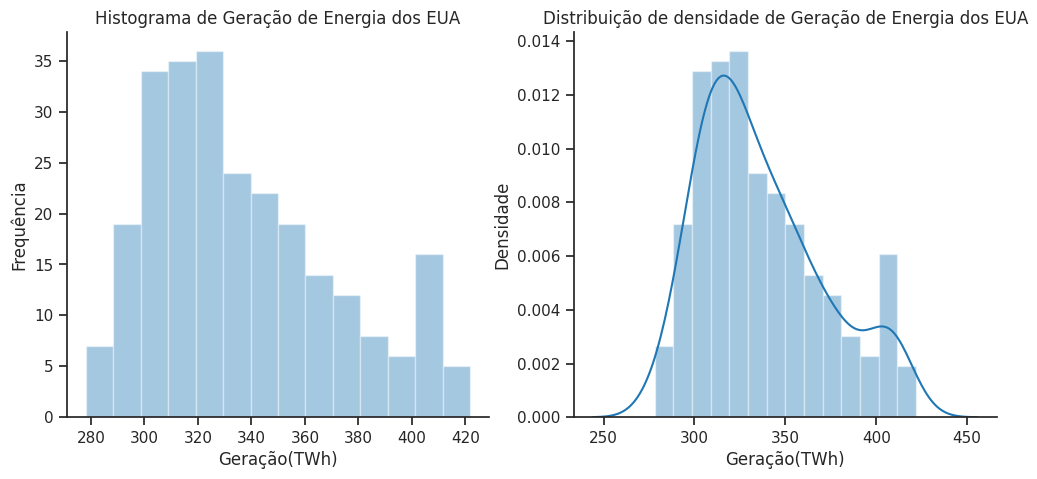

In [ ]:
sns.set_style("ticks")

# Criar um subplot com duas colunas
fig, axs = plt.subplots(ncols=2, figsize=(12, 5))

# Plotar o primeiro gráfico no primeiro subplot
sns.distplot(dataset_4["Geração(TWh)"], kde=False, bins=14, ax=axs[0])
axs[0].set_xlabel("Geração(TWh)")
axs[0].set_ylabel("Frequência")
axs[0].set_title("Histograma de Geração de Energia dos EUA")

# Plotar o segundo gráfico no segundo subplot
sns.distplot(dataset_4["Geração(TWh)"], kde=True, bins=14, ax=axs[1])
axs[1].set_xlabel("Geração(TWh)")
axs[1].set_ylabel("Densidade")
axs[1].set_title("Distribuição de densidade de Geração de Energia dos EUA")

sns.despine()
plt.show()

O histograma acima apresenta assimetria à direita e nos mostra qual a frequência de geração de energia registrado entre os anos de 2001 à 2022. Os valores mais frequentes estão em torno de 320 à 330 TWh, apresentando a frequência superior à 35% dos registros e a menor frequência em torno de 410 à 420 TWh.

Durante um ano a geração de energia apresenta dois ciclos apresentando dois picos de geração, isso pode ser observado no gráfico "Energia Gerada nos EUA (2001-2022)" e irá influenciar no histograma. Para melhorar a análise, será gerado gráficos anuais para observar melhor esse comportamento.


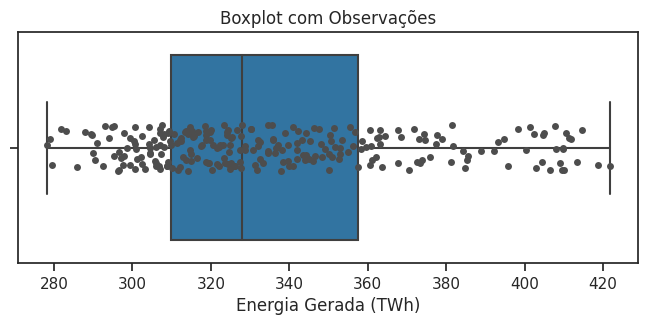

In [ ]:
plt.figure(figsize=(8,3)) # definindo a largura e altura do gráfico

ax_box = sns.boxplot(x="Geração(TWh)", data=dataset_4, orient="h")
ax_box = sns.stripplot(x="Geração(TWh)", data=dataset_4, color=".3", orient="h", size=5)

ax_box.set_title("Boxplot com Observações")
ax_box.set_xlabel("Energia Gerada (TWh)")

plt.show()

O Boxplot apresentado, reforça alguns pontos já apresentados no histograma e no resumo estatístico feito anteriormente, segue as observações:
*   Mediana(Q2) = 327.94 TWh.
*   1º Quartil(Q1) = 309.73 TWh.
*   3º Quartil(Q3) = 357.61 TWh.
*   Não há presença de outliers.






##### **5.1.4.Gráfico de Geração Mensal de Energia**

In [ ]:
# Agrupar as colunas de "Mês" e "Ano" com o "estado".
#
# Visualiar os valores de geração de energia.
dataset_5 = dataset_3.groupby(['Ano','Mês', 'Estado'])['Geração(TWh)'].sum().reset_index()

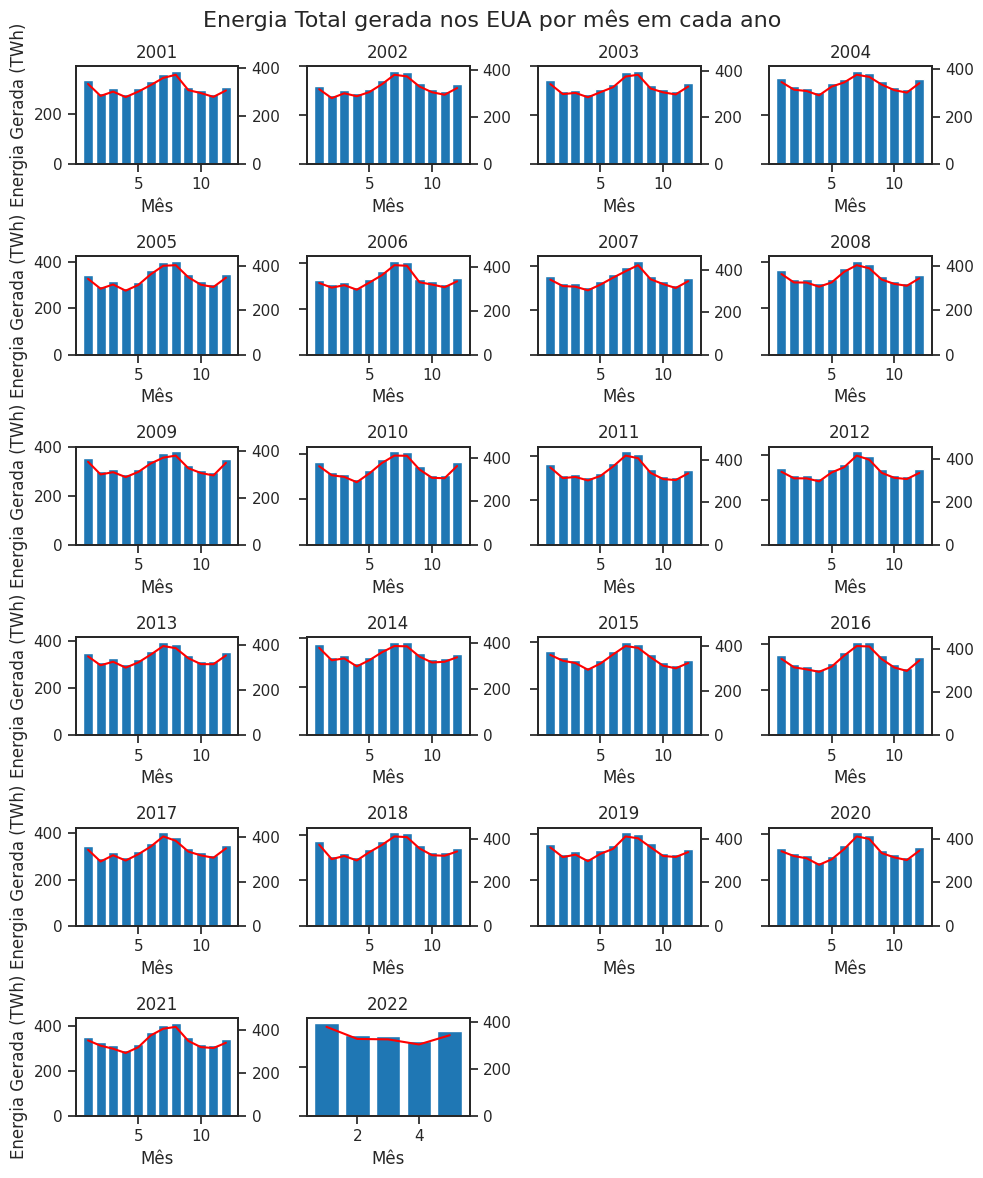

In [ ]:
# Definindo a dimensão para a figura que será criada
fig = plt.figure(figsize=(10, 12))
fig.suptitle('Energia Total gerada nos EUA por mês em cada ano', fontsize=16)

# O Loop for será usado para percorrer todos os dados
for i, ano in enumerate(dataset_5['Ano'].unique()):
    dados_ano = dataset_5[dataset_5['Ano'] == ano]
    dados_agrupados = dados_ano.groupby('Mês')['Geração(TWh)'].sum()

    # atualiza o índice do subplot a cada iteração
    ax = fig.add_subplot(6, 4, i+1)
    ax.bar(dados_agrupados.index, dados_agrupados.values)
    ax.set_title(f'{ano}')
    ax.set_xlabel('Mês')

    # Define a legenda somente para os gráficos da primeira coluna
    if i == 0 or i == 4 or i == 8 or i == 12 or i == 16 or i ==20:
        ax.set_ylabel('Energia Gerada (TWh)')
    else:
        ax.set_yticklabels([])

    # cria um segundo eixo y e plota a linha
    ax2 = ax.twinx()
    ax2.plot(dados_agrupados.index, dados_agrupados.values, color='red')
    ax2.set_ylim(0, dados_agrupados.values.max() * 1.1) # define limites para o eixo y direito

plt.tight_layout()
plt.show()

Os histogramas anuais de geração de energia nos EUA comprovam o que já havia sido levantado anteriormente. Há dois ciclos de geração durante o ano. Sendo o ciclo maior entre os meses de maio à outubro, apresentando o ápice de geração entre julho e agosto, que corresponde ao período de férias nos EUA. O segundo ciclo vai do mês de novembro à abril, apresentando o seu ápice entre os meses de Dezembro e Janeiro. Sendo abril e novembro os meses de menor geração de energia.

Resumidamente, há aumento de geração durante o auge do verão no hemisfério norte, impulsionado pelo aumento do uso de equipamentos para refrigeração. Já o aumento de geração durante o auge do inverno, no hemisfério norte, se deve ao consumo de energia utilizado para o aquecimento, porém não chega ao mesmo patamar do consumo de energia do verão.

Nesse momento, entra um dos três pilares fundamentais para o cientista de dados, que é o conhecimento da área. Uma hipótese que podemos levantar, pode ser melhor avaliada se buscarmos uma explicação nas leis da Física para o fenômeno, pois é necessário mais energia para resfriar algo do que para aquecê-lo. Isso ocorre porque a transferência de calor sempre ocorre do objeto mais quente para o mais frio, segundo a segunda lei da termodinâmica. Portanto, para resfriar um objeto, é necessário retirar energia térmica dele e transferi-la para um meio externo, como o ar ou a água. Essa transferência de calor requer energia adicional, o que significa que **é necessário gastar mais energia para resfriar algo do que para aquecê-lo**. Esse efeito observado em larga escala, nos ajuda a entender e a levar a hipótese do porque gasta-se mais energia no verão do que no inverno.

Após levantar a hipótese da temperatura influenciando na geração de energia, é importante deixar claro que ainda não posso afirmar que a minha hipótese é verdadeira, nenhum dado até agora apresentado relaciona a temperatura com a geração de energia e nem tão pouco posso afirmar que a temperatura é a única variável que afeta diretamente na variação da geração de energia ao longo dos meses de um ano.




**Boxplot pra Visualização Mensal da Geração**

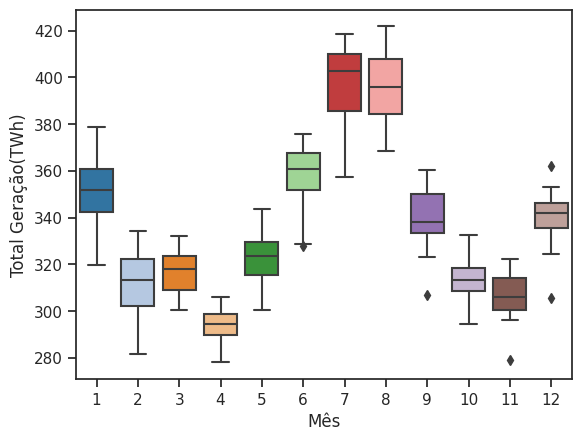

In [ ]:
# Criar um novo dataframe agrupado por mês e valor de geração
df_mensal_boxplot = dataset_5.groupby(['Mês', 'Geração(TWh)'])['Geração(TWh)'].sum().reset_index(name='Total Geração(TWh)')

# Criar um boxplot usando o seaborn
sns.boxplot(x='Mês', y='Total Geração(TWh)', data=df_mensal_boxplot)

# Exibir o boxplot
plt.show()

O boxplot mensal criado acima, irá percorrer os valores mensais registrados em cada ano. Já nessa configuração podemos observar que nos meses de junho, setembro, novembro e dezembro foram registrados possíveis "outliers", porém, são apenas valores muito abaixo ou muito acima de geração para os meses em questão mas não devem ser desconsiderados.

#### **5.2.Inclusão de Novos Dados**

Estando motivado a defender as hipóteses levantadas neste trabalho até o momento, tomei a decisão de coletar em outros datasets, dados para acrescentar no dataset original e analisar se de fato a temperatura tem correlação alta com a geração de energia.

Com isso, foi adicionado os datasets "url_3", "url_4" e "url_5",
que correspondem a dados mensais de temperatura, preço de geração de energia e quantidade de consumidores.

Antes de carregar os novos datasets, foi realizado pequenas modificações nos datasets, utilizando o MYSQL, excluindo colunas indesejadas, convertendo a temperatura de °F para °C e adequando a coluna



##### **5.2.1.Preparação dos Dados**

In [ ]:
# Transformar a coluna 'Mês/Ano' para o formato de data
dataset_temperatura['Mês/Ano'] = pd.to_datetime(dataset_temperatura['Mês/Ano'], format='%Y/%m')
dataset_price_kwh['Mês/Ano'] = pd.to_datetime(dataset_price_kwh['Mês/Ano'], format='%Y/%m')
dataset_consumidores['Mês/Ano'] = pd.to_datetime(dataset_consumidores['Mês/Ano'], format='%Y/%m')

# juntar os datasets com base na coluna "Mês/Ano"
dataset_completo = pd.merge(dataset_4, dataset_temperatura, on='Mês/Ano')
dataset_completo = pd.merge(dataset_completo, dataset_price_kwh, on='Mês/Ano')
dataset_completo = pd.merge(dataset_completo, dataset_consumidores, on='Mês/Ano')

#Ocultar a coluna Temperatura(°F)
dataset_completo = dataset_completo.drop('Temperatura(°F)', axis=1)

# exibir o novo dataset combinado
dataset_completo.head()

,Mês/Ano,Estado,Geração(TWh),Temperatura(°C),preço(cents/kWh)_residencial,preço(cents/kWh)_comercial,preço(cents/kWh)_industrial,qtd_consumidores
0,2008-01-01,US-TOTAL,362.998429,-0.96,10.14,9.39,6.33,143412299
1,2008-02-01,US-TOTAL,325.105597,1.50,10.16,9.46,6.34,142816242
2,2008-03-01,US-TOTAL,324.629850,5.48,10.45,9.62,6.46,143198070
3,2008-04-01,US-TOTAL,305.865031,10.22,10.93,9.79,6.64,143118223
4,2008-05-01,US-TOTAL,325.244802,15.20,11.40,10.05,6.75,143167043


##### **5.2.2.Informações Gerais**

In [ ]:
dataset_completo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 0 to 172
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Mês/Ano                       173 non-null    datetime64[ns]
 1   Estado                        173 non-null    object        
 2   Geração(TWh)                  173 non-null    float64       
 3   Temperatura(°C)               173 non-null    float64       
 4   preço(cents/kWh)_residencial  173 non-null    float64       
 5   preço(cents/kWh)_comercial    173 non-null    float64       
 6   preço(cents/kWh)_industrial   173 non-null    float64       
 7   qtd_consumidores              173 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 12.2+ KB


Foi garantido que com a inclusão dos novos dados, nenhuma coluna apresenta valor nulo.
Como o dataset original foi filtrado para apresentar apenas os valores de geração de energia dos EUA e os dados adicionais encontrados de temperatura, preço de energia e quantidade de consumidores são de 01/2008 à 05/2022, a quantidade de linhas foi reduzida para 173 registros.
O formato dos novos atributos está correto para números decimais, e a quantidade de consumidores para números inteiros.

Segue a descrição das colunas adicionais:

*   **Temperatura(°C)** - Dados Quantitativos intervalares que registram a temperatura média registrada nos EUA em graus Celcius.
*   **Preço(kWh)** - Dados Quantitativos e Continuos - Cada setor consumidor de energia nos EUA paga um valor diferente por kWh de energia consumida, para este trabalho, foi considerad o preço para os setores "residencial", "comercial" e "industrial". Os valores apresentados são em cents/kWh.
*   **qtd_consumidores** - Dados Quantitativos e contínuos - A coluna apresenta a variação da quantidade de consumidores de energia ao longo dos meses.


##### **5.2.3.Estatística Descritiva**

In [ ]:
# Resumo estatístico do novo dataset
dataset_completo.describe()

,Geração(TWh),Temperatura(°C),preço(cents/kWh)_residencial,preço(cents/kWh)_comercial,preço(cents/kWh)_industrial,qtd_consumidores
count,173.000000,173.000000,173.000000,173.000000,173.000000,1.730000e+02
mean,339.878034,11.836879,12.436994,10.504855,6.884451,1.494544e+08
std,34.234370,8.419890,0.860051,0.493615,0.368659,5.186565e+06
min,279.574150,-1.310000,10.140000,9.390000,6.320000,1.428020e+08
25%,313.292705,4.150000,11.910000,10.170000,6.590000,1.446446e+08
50%,333.249486,11.800000,12.470000,10.490000,6.790000,1.483872e+08
75%,360.455167,20.240000,13.010000,10.780000,7.150000,1.536156e+08
max,418.692524,24.870000,14.970000,12.150000,8.370000,1.607999e+08


**Pontos Observados:**

*   O primeiro questionamento que pode ser feito é porque o resumo estatístico de geração(TWh) está diferente do resumo estatístico realizado anteriormente. A modificação dos valores se da pois, como mencionado anteriormente, houve uma diminuição no range da data, diminuindo para 173 linhas ao invés de 257 (valor anterior).

*   Foi apresentado o resumo estatístico das novas variáveis incorporadas ao dataset. Para a coluna "qtd_consumidores" como a quantidade de consumidores ao longo dos meses está na casa dos milhões, os valores foram apresentados em notação científica.





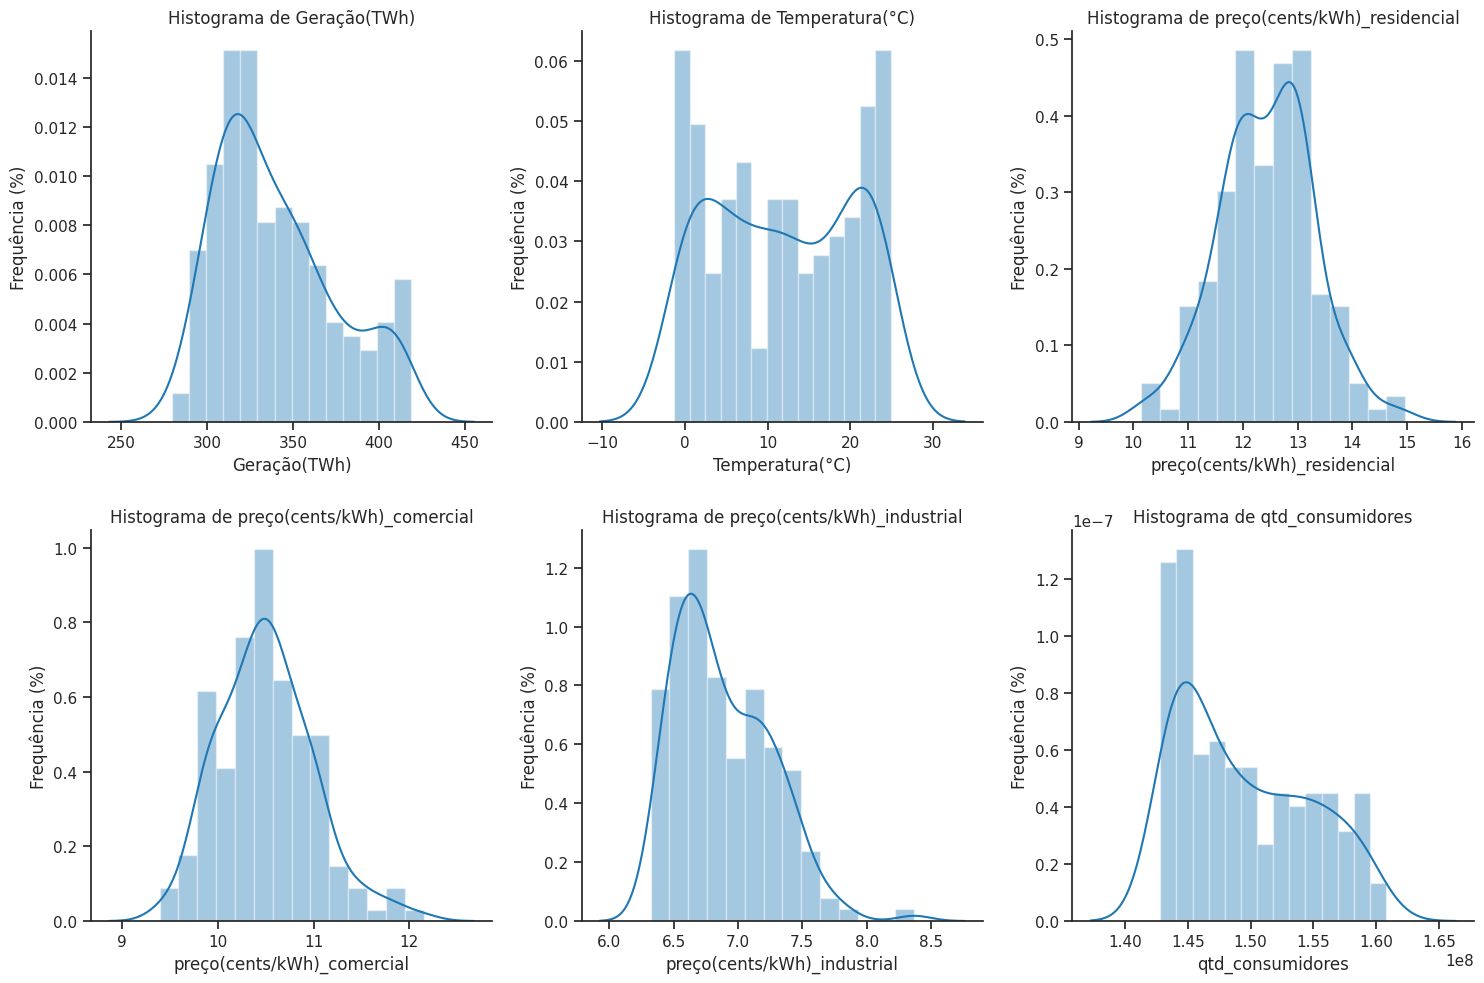

In [ ]:
# Criação dos histogramas para os novos atributos.
sns.set_style("ticks")

# Criar um subplot com duas colunas
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(15, 10))

# Lista com as colunas que serão utilizadas para cada gráfico
columns = ["Geração(TWh)", "Temperatura(°C)", "preço(cents/kWh)_residencial",
           "preço(cents/kWh)_comercial", "preço(cents/kWh)_industrial", "qtd_consumidores"]

# Loop for para iterar sobre os subplots
for i, ax in enumerate(axs.flatten()):
    # Plotar o gráfico correspondente à coluna
    sns.distplot(dataset_completo[columns[i]], kde=True, bins=14, ax=ax)
    ax.set_xlabel(columns[i])
    ax.set_ylabel("Frequência (%)")
    ax.set_title(f"Histograma de {columns[i]}")
    sns.despine()

plt.tight_layout()
plt.show()




Os histogramas acima revelam:

*   Nenhuma das distribuições são consideradas "normal"
*   Alteração no gráfico de geração devido à redução de linhas para 173.
*   Frequência dos registros de temperatura tendo valores negativos até em torno de 25°C.
*   Pode-se visualizar pela frequência de registros dos preços por consumo de energia que o valor pago tende a ser maior para a categoria residencial, seguida da comercial e por último a industrial sendo a mais barata.
*   O último histograma apresenta a frequência da quantidade de consumidores de energia nos EUA.





##### **5.2.4.Transformações Numéricas**

Considerando que o dataset não apresenta uma distribuição normal, é recomendado que se faça somente a normalização.

Para fins ditáticos, será realizado tanto a padronização como a normalização.

**Separação dos Dados entre Treino e Teste**

In [ ]:
# Removendo as colunas não quantitativas da padronização
dataset_completo_1 = dataset_completo.drop('Mês/Ano', axis=1)
dataset_completo_2 = dataset_completo_1.drop('Estado', axis=1)

# Separando as features (X) do target (y)
X = dataset_completo_2.drop('Geração(TWh)', axis=1)
y = dataset_completo_2['Geração(TWh)']

# Dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Obs: O particionamento dos dados em bases de treino e teste devem acontecer antes da transformação em todo o conjunto de dados.

**Padronização**

In [ ]:
# Cria uma instância da classe StandardScaler
scaler_p = StandardScaler()

# Ajustar o scaler para o dataset
scaler_p.fit(dataset_completo_2)

# Transforma os dados utilizando o scaler (O resutado é uma matriz)
dataset_padronizado = scaler_p.transform(dataset_completo_2)

# Converter a matriz para um dataframe do pandas
df_padronizado = pd.DataFrame(dataset_padronizado, columns=dataset_completo_2.columns)

# Visualizar o dataframe padronizado
print(df_padronizado.head())

   Geração(TWh)  Temperatura(°C)  preço(cents/kWh)_residencial  \
0      0.677317        -1.524251                     -2.678518   
1     -0.432762        -1.231237                     -2.655196   
2     -0.446699        -0.757175                     -2.317028   
3     -0.996418        -0.192588                     -1.757302   
4     -0.428683         0.400585                     -1.209236   

   preço(cents/kWh)_comercial  preço(cents/kWh)_industrial  qtd_consumidores  
0                   -2.265111                    -1.508331         -1.168338  
1                   -2.122888                    -1.481127         -1.283595  
2                   -1.797808                    -1.154678         -1.209763  
3                   -1.452410                    -0.665005         -1.225203  
4                   -0.924154                    -0.365761         -1.215763  


**Normalização**

In [ ]:
# Criar um objeto para normalzar os dados.
scaler_n = MinMaxScaler()

# Aplicar a normalização dos dados (O resultado é uma matriz)
dataset_normalizado = scaler_n.fit_transform(df_padronizado)

# Converter a matriz gerada para um dataframe do pandas
df_normalizado = pd.DataFrame(dataset_normalizado, columns=df_padronizado.columns)

# Visualizar o dataframe padronizado
print(df_normalizado.head())


   Geração(TWh)  Temperatura(°C)  preço(cents/kWh)_residencial  \
0      0.599664         0.013369                      0.000000   
1      0.327286         0.107334                      0.004141   
2      0.323866         0.259358                      0.064182   
3      0.188982         0.440413                      0.163561   
4      0.328286         0.630634                      0.260870   

   preço(cents/kWh)_comercial  preço(cents/kWh)_industrial  qtd_consumidores  
0                    0.000000                     0.004878          0.033909  
1                    0.025362                     0.009756          0.000791  
2                    0.083333                     0.068293          0.022006  
3                    0.144928                     0.156098          0.017569  
4                    0.239130                     0.209756          0.020282  


Obs: para esse trabalho, não está sendo considerado necessário o uso da discretização em algum atributo e nem do método "One-hot encoding/dummy encoding" para criação de variáveis binárias.

**Gráficos Boxplot - Dataset Original**

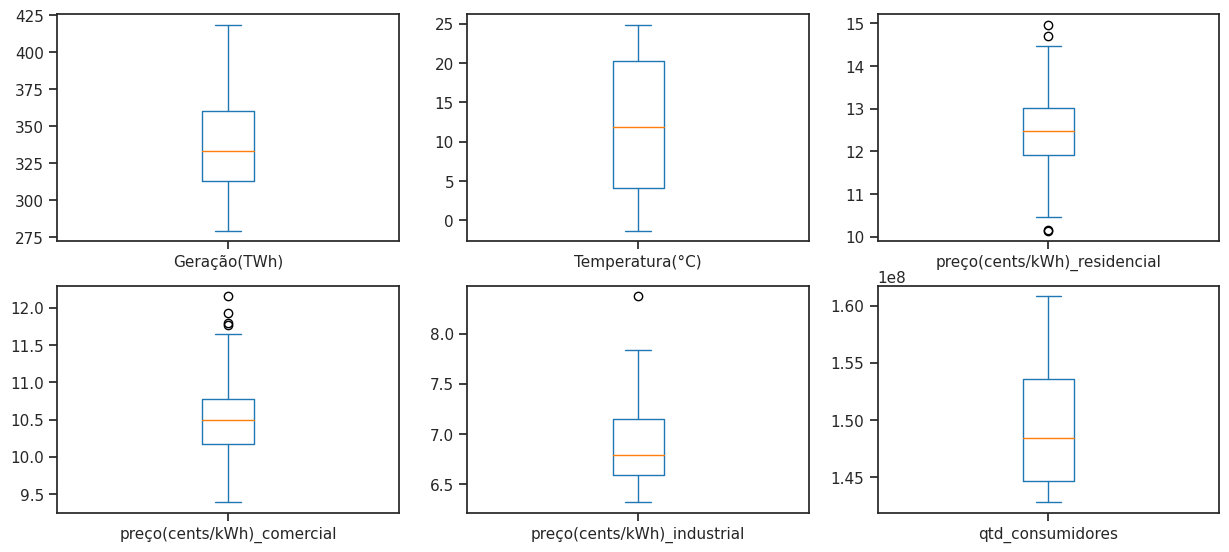

In [ ]:
# Criação do Boxplot para os novos atributos.
dataset_completo.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

**Gráficos Boxplot - Dataset Normalizado**

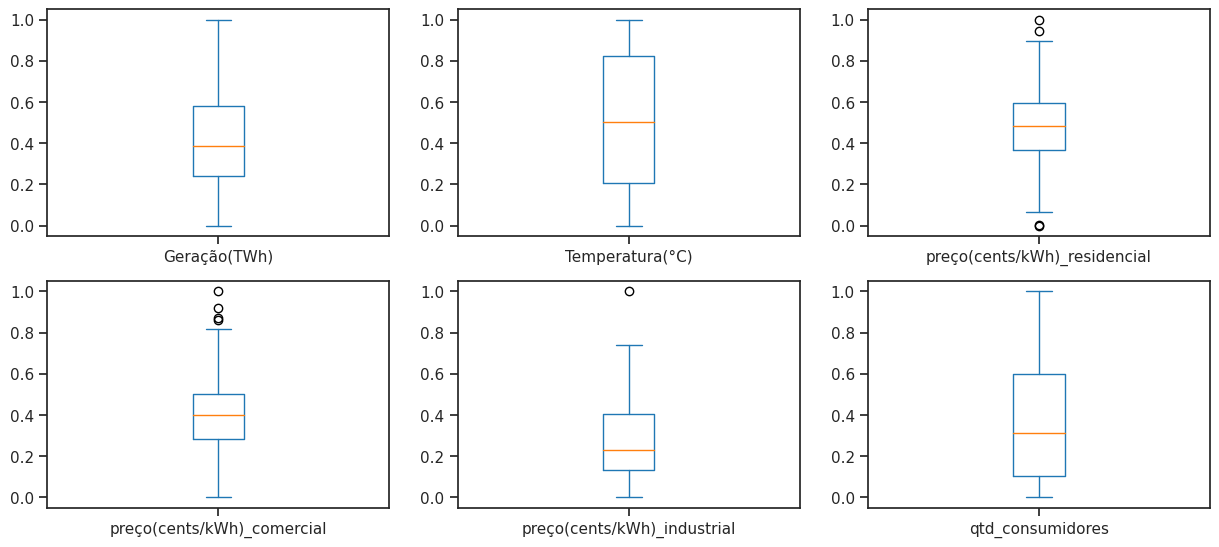

In [ ]:
# Criação do Boxplot para os novos atributos.
df_normalizado.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

**Observações sobre os boxplots:**

*   O novo boxplot de geração(TWh) apresenta algumas modificações quando comparado ao anterior (item 5.1.3), pois está sendo analisado 173 linhas na nova análise.
*   Foram apontados uma quantidade pequena de possíveis outliers nos gráficos que analisam o preço da energia por kWh, porém os mesmos não podem ser descartados pois são valores que foram cobrados dos consumidores.
*   Os gráficos do dataset com e sem normalização apresentam o mesmo comportamento, conforme esperado, sendo que os normalizados estão cumprindo o seu papel de transformar os dados no intervalor de 0 à 1.






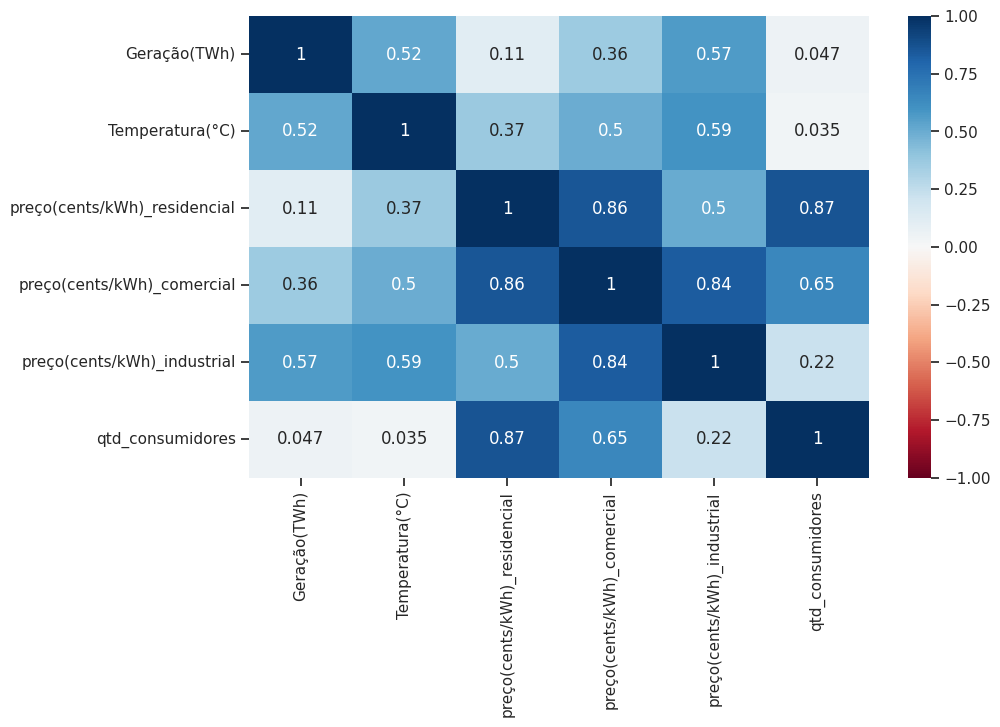

In [ ]:
# Matriz de Correlação com Seaborn
plt.figure(figsize = (10,6))
sns.heatmap(dataset_completo.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1);

**Observações sobre o gráfico de correlação:**

*   Conforme levantado a hipótese anteriormente, a temperatura de fato tem correlação alta com a geração de energia.
*   O preço da energia por kWh possui forte correlação com a geração de energia, quando é correlacionado o preço da energia na industria, para os demais setores a correlação diminui.
*   A correlação entre a quantidade de consumidores e a geração de energia é positiva mas não é considerada um fator predominante.
*   Há uma correlação alta entre os preços de energia entre si, conforme já era esperado, ao aumentar o preço da energia é esperado um aumento para todas as categorias (Residencial, comercial e industrial) assim como no caso da redução do preço de energia. Porém a maior correlação está entre a residencial e a comercial.
*   Há uma correlação forte também entre a quantidade de consumidores e o preço de energia residencial, a hipótese levantada é que, pelo senso comum, a quantidade de consumidores residenciais é a que mais aumenta em relação às demais.







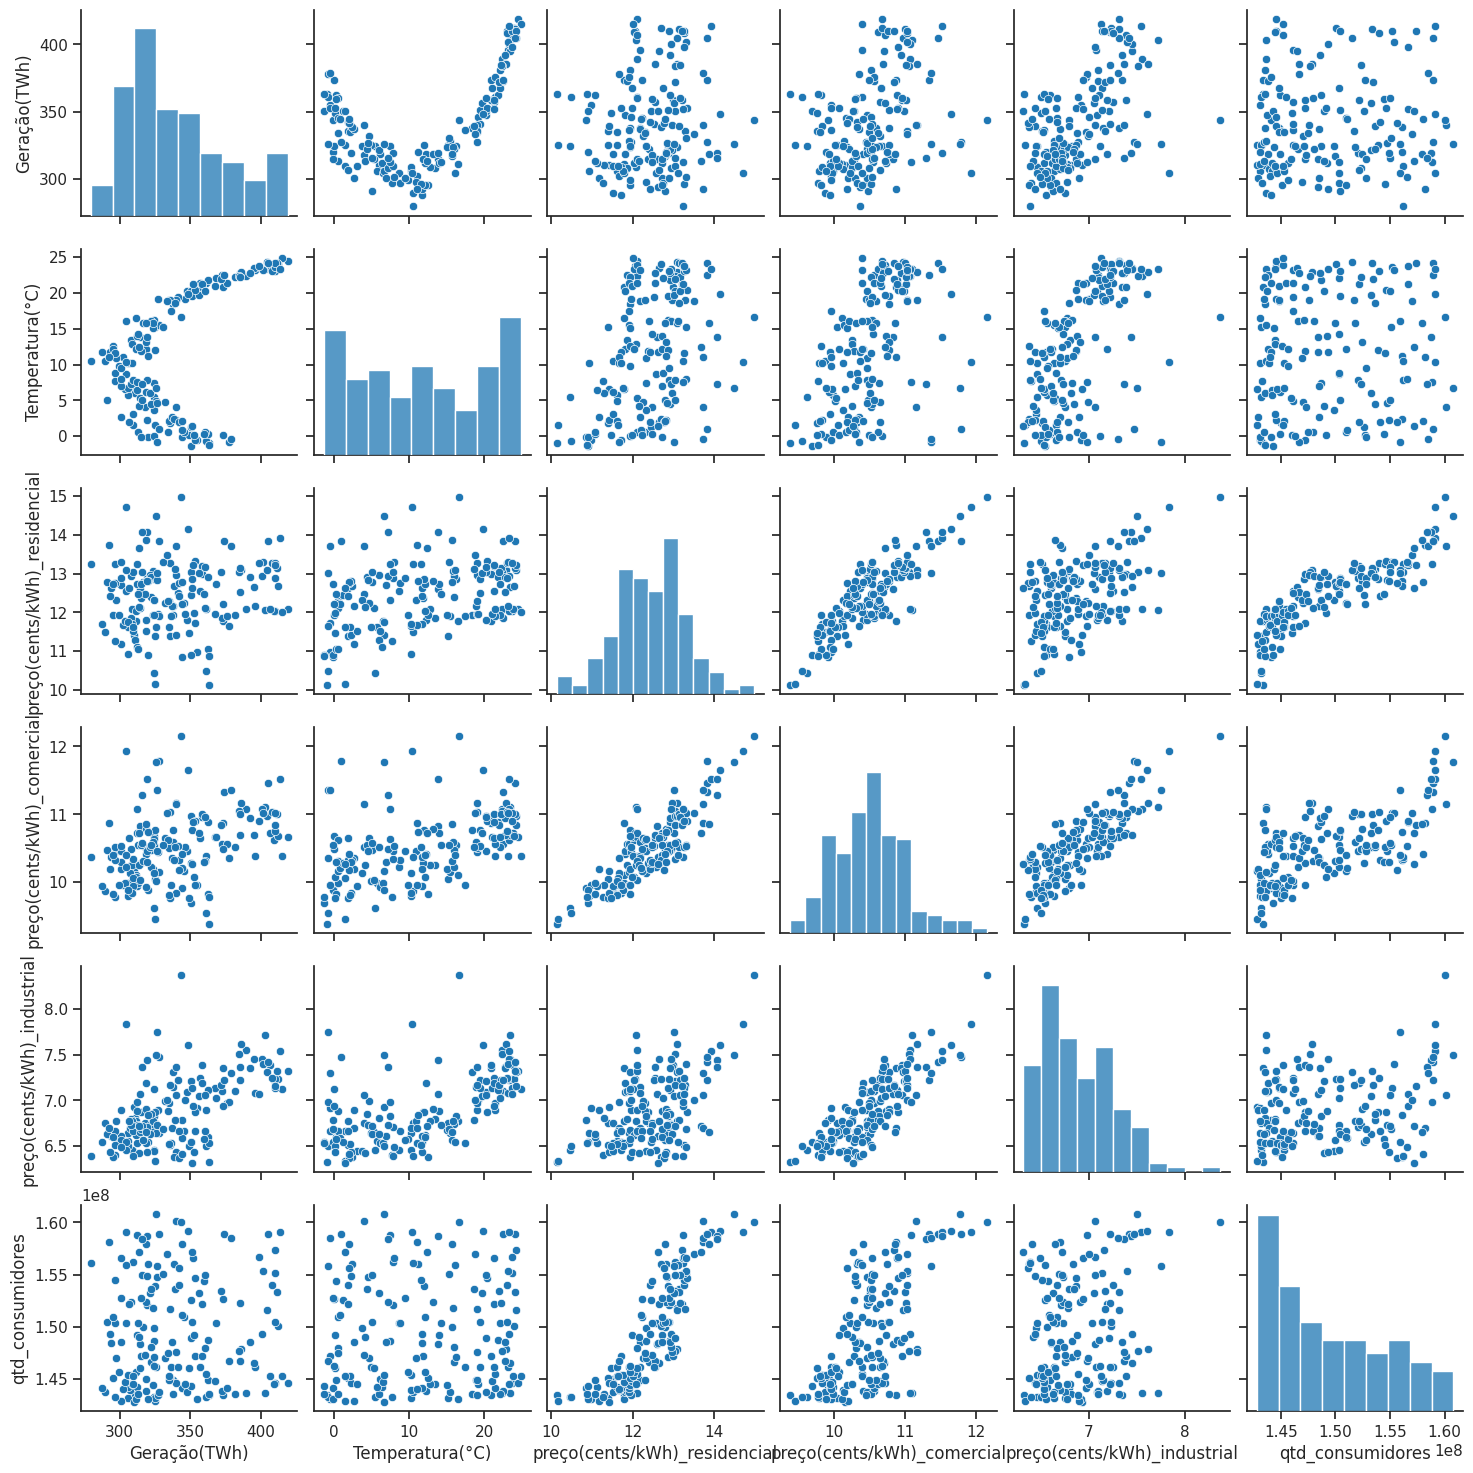

In [ ]:
# Criação do Scatter Plot com Seaborn
sns.pairplot(dataset_completo)

O principal objetivo do uso da função Scatter Plot neste momento do trabalho é para observar a relação da geração de energia com a temperatura, onde pude observar que há sim uma relação, porém irei apresentar no próximo gráfico uma melhor visualização para que seja possível chegar a uma conclusão.

##### **5.2.5.Gráficos Com Correlações**

Text(0.5, 1.2, 'Geração de Energia no Tempo e Variação da Temperatura e Preço de Energia')

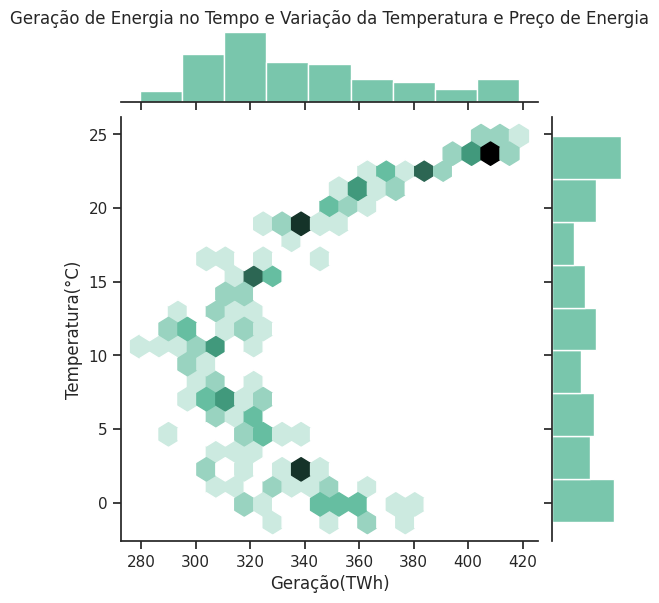

In [ ]:
#Criação do gráfico "Hexbin plot" da biblioteca do Seaborn
sns.set_theme(style="ticks")
sns.jointplot(data=dataset_completo, x="Geração(TWh)", y="Temperatura(°C)", kind="hex", gridsize=20, color="#4CB391")
#Titulo do gráfico
plt.title("Geração de Energia no Tempo e Variação da Temperatura e Preço de Energia", y=1.2)

**Observações do Gráfico**

*   Enfim foi possível obter uma melhor visualização entre a relação da temperatura com a geração de energia.
Foi levantado anteriormente a hipótese de que há dois ciclos de geração de energia nos EUA, onde no primeiro ciclo há o aumento de geração no verão e o segundo ciclo há novamente o aumento de geração de energia durante o inverno, o gráfico acima ajuda a defender a hipótese.

*   O gráfico apresenta o histograma de geração no eixo x, o histograma da temperatura no eixo y e os hexágonos apresentados mostram a relação entre as duas variáveis, quanto mais escuro o hexágono, maior a quantidade de pontos nesta região do gráfico.
Com isso, pode-se afirmar que em temperaturas altas, normalmente registradas no verão do hemisfério norte, haverá picos de geração de energia para suprir a demanda necessária para resfriamento, quando a temperatura estiver mais amena em torno de 10°C serão registados os menores valores de geração e ao registrar temperaturas em torno de 0°C a geração de energia volta a crescer para suprir a demanda necessária para o aquecimento.

*   A forma de "U deitado" do gráfico também serve para comprovar a hipótese de que gasta-se mais energia para resfriar do que para aquecer um ambiente. a explicação física foi levantada anteriormente para tentar explicar o fenômeno.


Text(0.5, 1.0, 'Geração de Energia no Tempo e Variação da Temperatura e Preço de Energia')

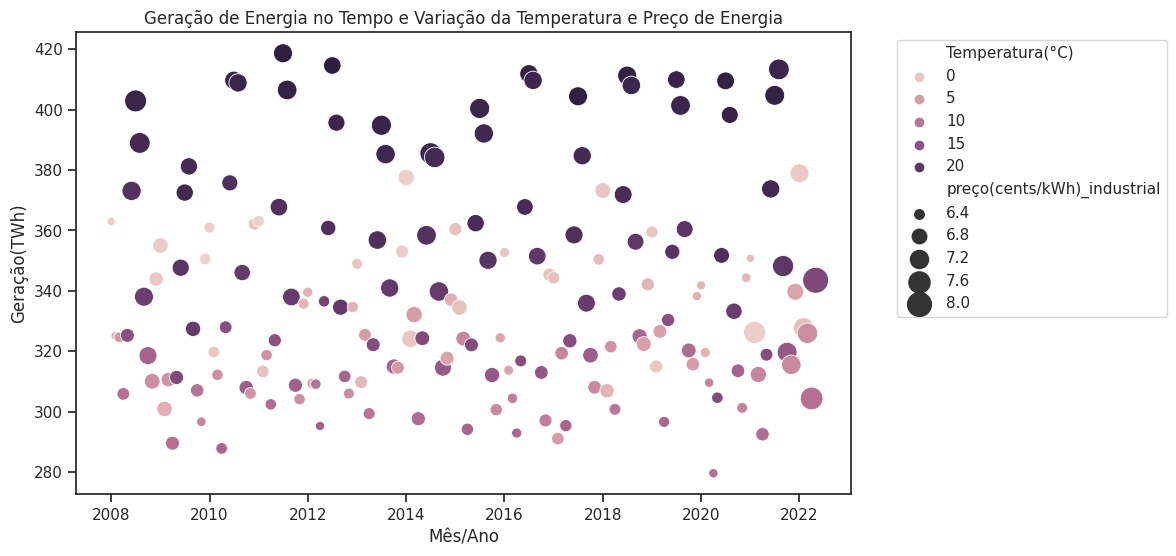

In [ ]:
#Tamanho do gráfico
plt.figure(figsize=(10,6))

#Definindo os parâmetros do gráfico escolhido
sns.scatterplot(x="Mês/Ano", y="Geração(TWh)", hue="Temperatura(°C)", size="preço(cents/kWh)_industrial", sizes=(35, 350), \
                data=dataset_completo)

#Movendo a caixa de legenda
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#Titulo do gráfico
plt.title("Geração de Energia no Tempo e Variação da Temperatura e Preço de Energia")

**Motivação e Observações Sobre o Gráfico**

Após inserir novos dados no dataset e observar a correlação entre os atributos, decidi gerar um gráfico que relacionasse os atributos que possuem um correlação alta para conseguir comprovar visualmente.

O gráfico consegue relacionar três dados quantitativos e um temporal e nos mostras os seguintes pontos:

*   Quanto maior a temperatura, maior será o preço pago pela energia consumida industrialmente, sendo representado pelas pelos circulos e grandes e escuros, que também correspondem há épocas em que a energia gerada apresenta os seus maiores valores.

*   Um puco abaixo dos circulos maiores e mais escuros serão encontrados os circulos mais claros, que correspondem à temperaturas mínimas registradas. Durante esse período também haverá uma geração de energia alta, porém o valor cobrado para o consumo de energia no setor industrial apresenta valores mais baixos.

*   Para temperaturas mais amenas, em torno de 10°C, o preço da energia consumida também apresenta valores baixos.

*   Importante observar que os anos de 2021 e meados de 2022 apresentam um comportamento que se diferem dos outros anos, apresentando um aumento considerável no preço da energia para faixas diferentes de temperatura. Diversos fatores podem ser responsáveis por esse comportamento, inclusive fatores econômicos como o aumento da taxa de juros, podem ter influência direta, afetando o  aumento no preço do custo de geração, entre outros fatores.







**Gráfico de Regrassão**

Text(0.5, 1.0, 'Gráfico de Regressão Polinomial')

<Figure size 1400x1000 with 0 Axes>

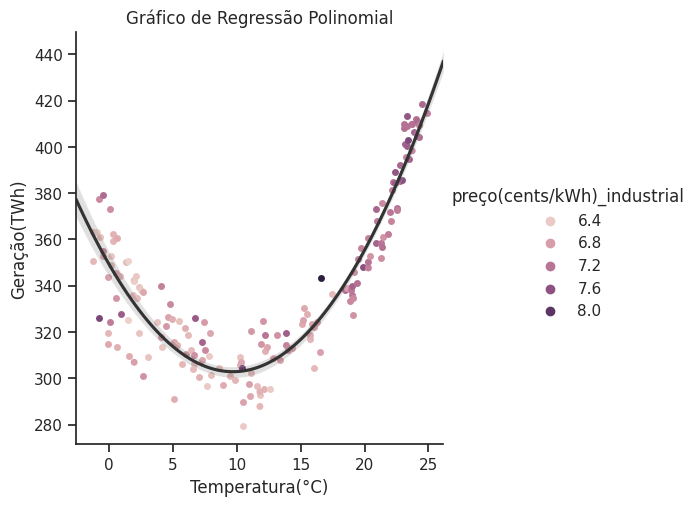

In [ ]:
# Tamanho do gráfico
plt.figure(figsize=(14,10))

# Definindo as entradas do gráfico
sns.catplot(
    data=dataset_completo, x="Temperatura(°C)", y="Geração(TWh)", hue="preço(cents/kWh)_industrial",
    native_scale=True, zorder=1
)
sns.regplot(
    data=dataset_completo, x="Temperatura(°C)", y="Geração(TWh)",
    scatter=False, truncate=False, order=2, color=".2",
)

# Título do gráfico
plt.title("Gráfico de Regressão Polinomial")

**Motivação e Observações Sobre o Gráfico**

*   Um dos objetivos de se trabalhar com **aprendizado supervisionado** é conseguir resolver um problema de classificação e regressão. Para esse trabalho seria interessante determinar a regressão, já que estamos interessados em determinar o valor de geração de energia relacionando com outras variáveis.

*   A linha de regressão vista no gráfico é uma linha que representa a relação entre a temperatura e a geração de energia elétrica em terawatt-hora (TWh), junto com pontos referentes ao preço da energia  para o setor industrial. A linha é obtida através de um ajuste de regressão polinomial aos dados, que pode ser de segunda ordem, conforme indicado na imagem.

No item seguinte será determinado o erro da linha de regressão plotada.








**Encontrar o Erro da Linha de Regressão**

In [ ]:
# Definindo as variáveis independentes e dependentes
x = dataset_completo['Temperatura(°C)'].values.reshape(-1,1)
y = dataset_completo['Geração(TWh)'].values

# Definindo o grau do polinômio (Conforme visto no gráfico)
grau = 2

# Criando as features polinomiais
poly = PolynomialFeatures(grau)
x_poly = poly.fit_transform(x)

# Ajustando o modelo de regressão
model = LinearRegression()
model.fit(x_poly, y)

# Calculando o erro da regressão
y_pred = model.predict(x_poly)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse).round(2)
print(f"Erro da regressão: {rmse}")

Erro da regressão: 11.52


Com isso, posso afimar que a linha de regressão polinomial de grau 2 encontrada no último gráfico é de 11,52 para mais e para menos.

###**5.3.Geração por Fonte de energia - EUA**

A segunda parte deste trabalho irá analisar o tipo de fonte de energia utilizada para a geração de energia nos EUA.

####**5.3.1.Preparação dos Dados**

In [ ]:
# Filtro removendo registros "total" da coluna "Fonte de Energia"
dt_fonte_energia_1 = dataset_1['Fonte_de_Energia'] != 'Total'

# Filtro da coluna Estado para "US-Total"
dt_fonte_energia_2 = dataset_1['Estado'] == 'US-TOTAL'

# Filtro da coluna "Tipo de produção" para "Total Electric Power Industry"
dt_fonte_energia_3 = dataset_1['Tipo_de_produção'] == 'Total Electric Power Industry'

# Juntar os filtros realizados anteriormente em uma única variável
dt_fonte_energia_4 = dataset_1[dt_fonte_energia_1 & dt_fonte_energia_2 & dt_fonte_energia_3]

####**5.3.2.Gráfico de Geração por Fonte de Energia**

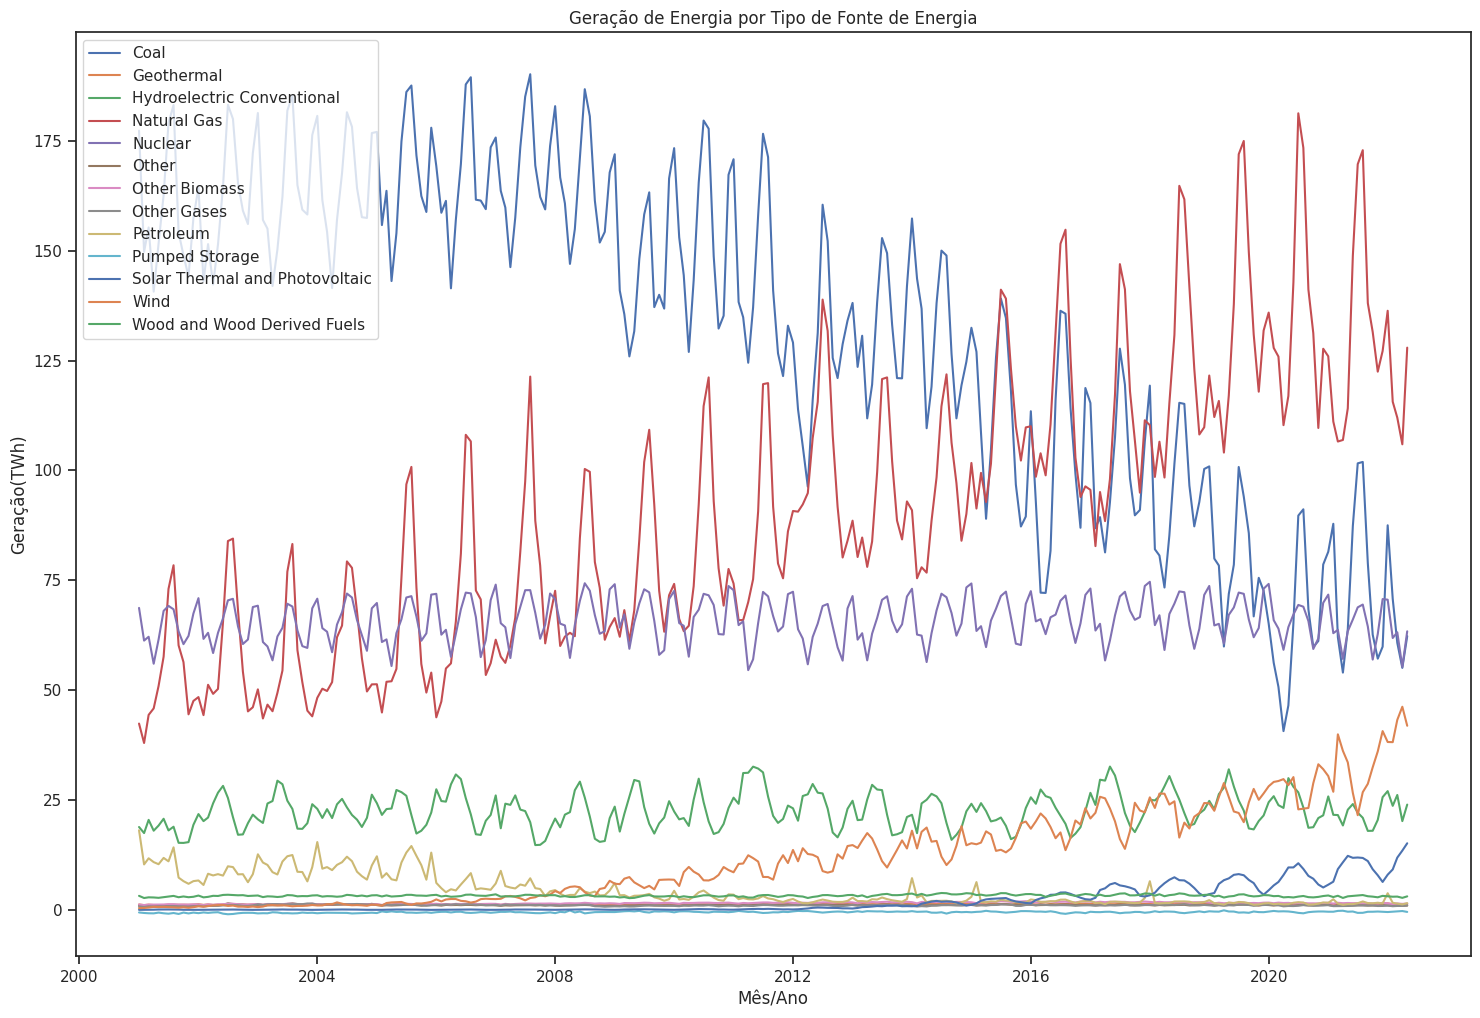

In [ ]:
fig, ax = plt.subplots(figsize=(18, 12))

for source, data in dt_fonte_energia_4.groupby('Fonte_de_Energia'):
    ax.plot(data['Mês/Ano'], data['Geração(TWh)'], label=source)

ax.set_xlabel('Mês/Ano')
ax.set_ylabel('Geração(TWh)')
ax.legend(loc='upper left')
ax.set_title("Geração de Energia por Tipo de Fonte de Energia")

plt.show()

**Observações sobre o gráfico:**

*   Pode-se observar que no início dos anos 2000 a fonte de energia usada em larga escala para a geração de energia nos EUA era o carvão (Coal), que ao longo dos anos foi diminuindo a sua participação na matriz energética dos EUA, principalmente devido à leis de incentivo da substituição de combustíveis fosseis por fontes renováveis.
*   Em torno de 2016, pode-se observar que o gás natural(Natural Gas) Passou a ser a fonte principal de energia nos EUA.
*   A energia gerada por energia nuclear manteve o seu patamar, não apresentando crescimento expresivo mas continua sendo a terceira maior fonte de energia dos EUA, porém sem expectativas de crescimento devido à questões de segurança e custo elevado para criação da usina e tratamento do lixo radioativo.
*   Importante destacar o crescimento da energia eólica e da solar que apresenta uma aceleração no crescimento principalmente nos ultimos anos, podendo ter um destaque maior para os próximos anos.
*   A energia gerada por hidroelétricas (Hydroeletric Conventional), se manteve no mesmo patamar, isso se deve ao fato de que há uma disponibilidade muito baixa de novos locais possíveis para a instalação de uma usina, assim como leis de proteção ambiental e o custo elevado para a implantação de novas usinas.








###**5.4.Geração por Estado**

Tópico dedicado a analisar o comportamento dos Estados dos EUA na geração de energia.

####**5.4.1.Preparação de Dados**

In [ ]:
# Selecionar linhas da coluna "Estado" que não sejam iguais a "US-TOTAL"
dataset_estados_1 = dataset_1[dataset_1["Estado"]!='US-TOTAL']

# Filtro em duas colunas
dataset_estados_2 = dataset_estados_1[(dataset_estados_1["Tipo_de_produção"]!="Total Electric Power Industry") & \
                                      (dataset_estados_1["Fonte_de_Energia"]!="Total")]

# Agrupamento da soma de geração por estado e fonte de energia.
dataset_estados_3 = dataset_estados_2.groupby(by=["Fonte_de_Energia","Estado"]).sum()["Geração(TWh)"].reset_index()

# Verificar se a tabela está de acordo com o esperado
dataset_estados_3.head()


,Fonte_de_Energia,Estado,Geração(TWh)
0,Coal,AK,13.575793
1,Coal,AL,1144.623786
2,Coal,AR,542.084089
3,Coal,AZ,759.333144
4,Coal,CA,29.303358


####**5.4.2.Gráfico da Quantidade de Energia Gerada por Estado e Fonte de Energia**

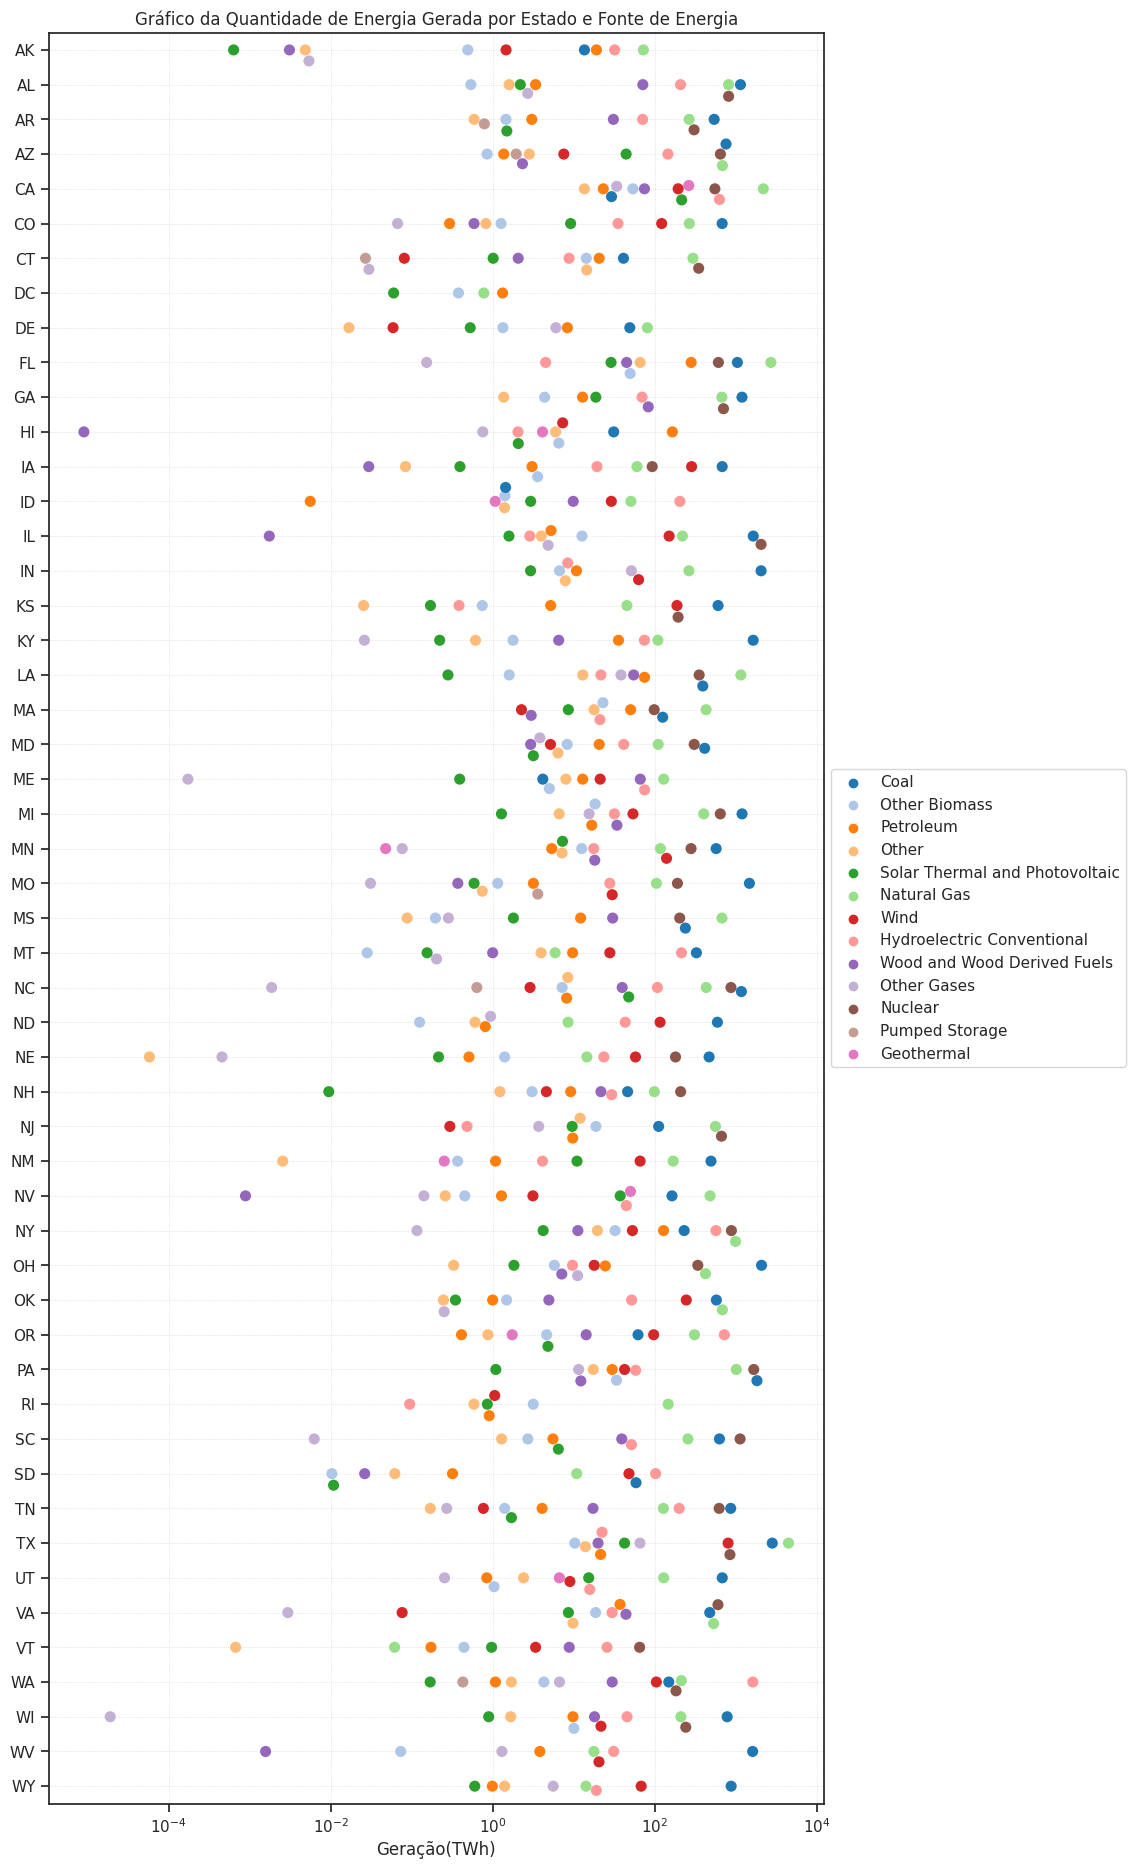

In [ ]:
# Ordernar o dataframe pelo nome do Estado em ordem alfabética
dataset_estados_3 = dataset_estados_3.sort_values(by="Estado")

# Tamanho do gráfico
fig, ax = plt.subplots(figsize=(10,23))

# Definindo as entradas do gráfico
sns.set_theme(style="whitegrid", palette="tab20")
ax = sns.swarmplot(data=dataset_estados_3, x="Geração(TWh)", y="Estado", hue="Fonte_de_Energia", size=8)
ax.set(ylabel="")

# Adicionar grid
ax.grid(True, color='lightgray', linewidth=0.5, linestyle='dotted')

# Definição da escala logarítimica
ax.set_xscale('log')

# Título do Gráfico
ax.set_title("Gráfico da Quantidade de Energia Gerada por Estado e Fonte de Energia")

# Mover a legenda para à direita do gráfico.
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

**Observações sobre a escolha gráfico:**

*   O gráfico acima tem o objetivo de verificar por estado qual é o tipo de geração de energia que predomina na região.
*   Os valores de geração correspondem a soma total de energia gerada de 2001 à meados de 2022.
*   Para facilitar a visualização do gráfico foi usada a escala logarítmica no eixo x e os estados estão ordenados em ordem alfabética no eixo y.

**Resultados obtidos:**

*   No último intervalo do eixo x, com os valores de 100 à 10.000 TWh, pode-se observar quais são os tipos de geração de energia que mais se destacam para cada Estado dos EUA. Onde há uma predominância do Carvão (Coal) e do Gás Natural (Natural Gas) e energia nuclear (Nuclear).

*   O Texas, representado pela sigla "TX", California "CA", Florida "FL" e Pensilvânia "PA", são estados que se destacam por ter gerações altas para diferentes tipos de geração. Já o Distrito de Colúmbia "DC" é o que apresenta a menor geração de energia durante o intervalo de tempo analisado.

##**6.Conclusões**

*   Em um modelo real de machine learning que tivesse como atributo alvo a energia gerada de um país, seria necessário um **modelo supervisionado** com uma série de atributos previsores como as condições climáticas de uma região (Incidência de raios solares, vento, chuva), disponibilidade de recursos naturais (ex: Carvão, água), demanda de energia de cidades inteiras, preço para cada tipo de geração de energia, até mesmo mudanças políticas podem interferir na geração de energia. Tendo esses dados em mãos, além de outros não mencionados neste estudo, o modelo iria aprender a relação entre as entradas e as saídas esperadas e em seguida fazer suas previsões.
*   Com base no modelo supervisionado apresentado, foi possível obter uma curva de regressão polinomial de segundo grau, permitindo visualizar a tendência geral dos dados e poderia ser usada para fazer previsões ou extrair informações sobre a relação entre as variáveis, porém, não seria possível construir um modelo confiável de previsão de geração de energia com o modelo apresentado devido a complexidade que é o mercado de energia, conforme explicado anteriormente, porém, para fins de análise descritiva e diagnóstica dos dados, os datasets são bastante confiáveis e apresentam visões bem interessantes.
*   Sobre o uso do dataset. Tendo 03 datasets disponíveis para análise (Original, Padronizado e Normalizado), o recomendado seria a utilização do dataset normalizado devido aos dados não apresentarem uma distribuição normal. Porém, um dos motivos para utilizar os dados normalizados seria para melhorar a visualização dos gráficos, comparar dados que possuem diferentes escalas ou unidades de medida além de ajudar a destacar padrões, reduzindo os valores muito discrepantes. Como o dataset original não apresentava uma quantidade grande de valores discrepantes e os padrões foram identificados. Foi decidido usar os dados com valores absolutos, ou seja, que apresentam os valores reais de cada instância.
*   O primeiro dataset analisado nesse estudo apresentava somente o valor de geração de energia como atributo quantitativo, sendo dividido por uma série de atributos como, dados temporais, estados, tipo de produção e fonte de energia. Após visualizar o histograma mensal de geração, ficou evidente que o valor de geração estava apresentando um padrão de comportamento anualmente. Com isso, hipóteses foram levantadas e mais dados foram incluídos no dataset para observar a possível correlação entre a energia gerada e a temperatura. De fato a temperatura influencia na geração de energia, principalmente nos meses de verão e inverno. Além de observar a correlação de outros atributos como o preço da energia e número de consumidores.
*   Uma análise bastante interessante também foi observar a evolução dos tipos de geração de energia nos EUA, no range escolhido de um pouco mais de 20 anos foi possível observar que o carvão, que era a fonte predominante de energia ao longo dos anos foi diminuindo a sua participação e dando lugar ao gás natural. E nos últimos anos houve um salto nas fontes de energia renováveis, que merecem atenção para os próximos anos.
*   Uma sugestão para trabalhos posteriores seriam obter um dataset com valores diários de geração de energia, temperatura de cada região, assim como o valor da energia e crescimento de consumidores por estado  ao invés de trabalhar com um valor médio mensal, assim teríamos dados ainda mais confiáveis, porém, não consegui achar datasets disponíveis para com esses dados.
*   Outras análises que também que poderiam ser feitas neste trabalho seria achar relações entre os tipos de produção, verificar como se comporta o sistema de cogeração dos EUA ao longo dos anos, entre outras análises que poderiam ser feitas com esses atributos categóricos.











